# Important Links : 

1. Find ODBC driver on your laptop : [Find ODBC driver on your laptop](https://stackoverflow.com/questions/46045834/pyodbc-data-source-name-not-found-and-no-default-driver-specified)
2. connection guide :[connection guide](https://www.mssqltips.com/sqlservertip/7220/sql-server-connection-strings-reference-guide/)
3. SQL Server on Docker : [SQL Server on Docker](https://www.youtube.com/watch?v=fFpDf5si_Hw)
4. Microsoft Documentation on SQL Server containers : [Microsoft Documentation on SQL Server containers](https://learn.microsoft.com/en-us/sql/linux/sql-server-linux-docker-container-deployment?view=sql-server-ver16&pivots=cs1-bash)


In [1]:
import sys 
sys.path.append("./__pypackages__/3.8/lib/")

In [7]:
import pyodbc 
import pickle 
import pandas as pd
cnxn = pyodbc.connect('DRIVER={SQL Server};Server=localhost;Database=master;Port=1433;UID=sa;PWD=<STRONG_PASSWORD>')
cursor = cnxn.cursor()

In [8]:

sql = """
Use [msdb];


IF OBJECT_ID('[dbo].[pkl_data]', 'U') IS NOT NULL
DROP TABLE [dbo].[pkl_data];


CREATE TABLE [dbo].[pkl_data]
(
    [Id] INT NOT NULL PRIMARY KEY, -- Primary Key column
    [library] VARCHAR(MAX),
    [pkl] VARBINARY(MAX) NOT NULL
    -- Specify more columns here
);


"""
cursor.execute(sql) 
#cursor.close()

In [9]:
sql = """
use [msdb];
insert into  [dbo].[pkl_data] (Id,library, pkl)
VALUES (?, ?,convert(varbinary(max), ?));
"""
import pickle
for i in range(1,10):
    params = (i,"pyodbc",pickle.dumps([1,2,3,4]))
    cursor.execute(sql, params) 

In [10]:
cursor.commit()

In [11]:
import pandas as pd 
df = pd.read_sql_query("SELECT * FROM [msdb].[dbo].[pkl_data]" ,cnxn)
df

C:\Users\Abinav Ramesh\AppData\Local\Temp\ipykernel_34684\482219180.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM [msdb].[dbo].[pkl_data]" ,cnxn)


,Id,library,pkl
0,1,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
1,2,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
2,3,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
3,4,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
4,5,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
5,6,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
6,7,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
7,8,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...
8,9,pyodbc,b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\...


In [12]:
[pickle.loads(i) for i in df['pkl']]

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4]]

In [13]:
cursor.close()
cnxn.close()

# Using pypyodbc

In [14]:
import pypyodbc 
import pickle
cnxn_pypyodbc = pypyodbc.connect('DRIVER={SQL Server};Server=localhost;Database=master;Port=1433;UID=sa;PWD=Admin@1234')
cursor_pypyodbc = cnxn_pypyodbc.cursor()
# sql = """
# CREATE TABLE  [tempdb].[dbo].[temptable]
# (
#     TableNameId INT NOT NULL PRIMARY KEY,
#     Column1 [NVARCHAR](50) NOT NULL,
#     Column2 [NVARCHAR](50) NOT NULL, 
#     pkl varbinary(max)
# )
# """
# cursor_pypyodbc.execute(sql) 

sql = """
insert into  [msdb].[dbo].[pkl_data] (Id,library, pkl)
VALUES (?, ?,convert(varbinary(max), ?));
"""
import pickle
for i in range(11,20):
    params = (i,"pypyodbc",pickle.dumps([1,2,3,4]))
    cursor_pypyodbc.execute(sql, params) 




In [15]:
cursor_pypyodbc.commit()

In [28]:
cursor_pypyodbc.close()
cnxn_pypyodbc.close()

In [17]:
import pandas as pd 
df = pd.read_sql_query("SELECT * FROM [msdb].[dbo].[pkl_data]" ,cnxn_pypyodbc)
df

C:\Users\Abinav Ramesh\AppData\Local\Temp\ipykernel_34684\3943400619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM [msdb].[dbo].[pkl_data]" ,cnxn_pypyodbc)


,id,library,pkl
0,1,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
1,2,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
2,3,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
3,4,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
4,5,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
5,6,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
6,7,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
7,8,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
8,9,pyodbc,"[128, 4, 149, 13, 0, 0, 0, 0, 0, 0, 0, 93, 148..."
9,11,pypyodbc,"[128, 4, 149, 13]"


In [18]:
[pickle.loads(i) for i in df[df['library']=='pypyodbc']['pkl']]

UnpicklingError: pickle data was truncated

In [19]:
[pickle.loads(i) for i in df[df['library']=='pyodbc']['pkl']]

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4]]

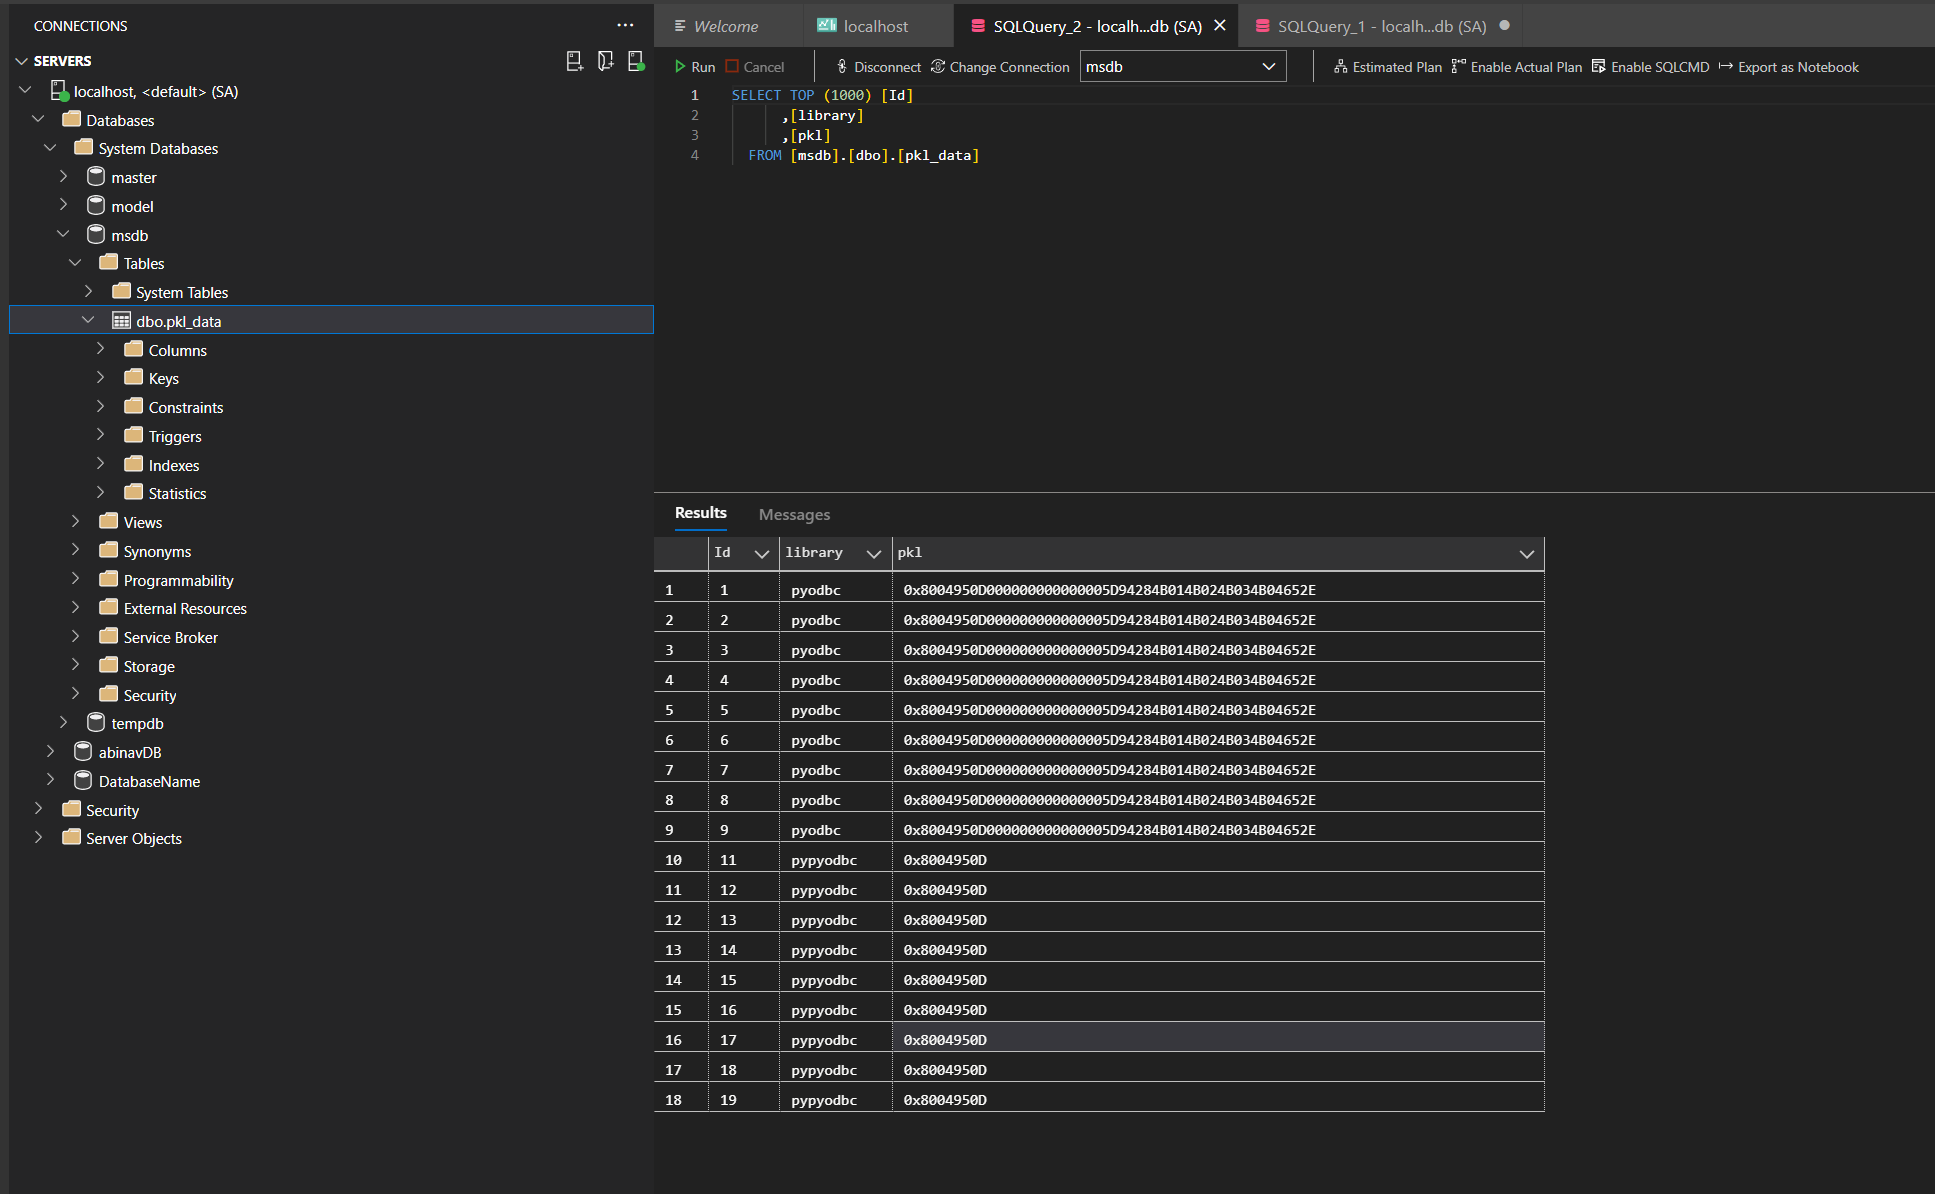